# Module 4, Assignment 2: Logistic Regression and Tree-based Methods (Supervised Learning)

# Part 1: Predicting loan repayment
In the lending industry, investors provide loans to borrowers in exchange for the promise of repayment with interest. If the borrower repays the loan, then the lender profits from the interest. However, if the borrower is unable to repay the loan, then the lender loses money. Therefore, lenders face the problem of predicting the risk of a borrower being unable to repay a loan.

To address this problem, we will use publicly available data from LendingClub.com, a website that connects borrowers and investors over the Internet. This dataset represents 9,578 3-year loans that were funded through the LendingClub.com platform between May 2007 and February 2010. The binary dependent variable not_fully_paid indicates that the loan was not paid back in full (the borrower either defaulted or the loan was "charged off," meaning the borrower was deemed unlikely to ever pay it back).

To predict this dependent variable, we will use the following independent variables available to the investor when deciding whether to fund a loan:


*   **credit.policy:** 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
*   **purpose:** The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
*   **int.rate:** The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
*   **installment:** The monthly installments ($) owed by the borrower if the loan is funded.
*   **log.annual.inc:** The natural log of the self-reported annual income of the borrower.
*   **dti:** The debt-to-income ratio of the borrower (amount of debt divided by annual income).
*   **fico:** The FICO credit score of the borrower.
*   **days.with.cr.line:** The number of days the borrower has had a credit line.
*   **revol.bal:** The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
*   **revol.util:** The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
*   **inq.last.6mths:** The borrower's number of inquiries by creditors in the last 6 months.
*   **delinq.2yrs:** The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
*   **pub.rec:** The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

## Preparing the Dataset

Load the dataset loans_imputed.csv into a data frame called loans, and explore it using the info() and describe() functions. (A side note: the original data had missing values, so we imputed them first.)

From this output, we can observe the proportion of the loans in the dataset were not paid in full (a number between 0 and 1).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import statsmodels.api as sm

In [ ]:
# Load dataset
loans = pd.read_csv("loans_imputed.csv")

In [ ]:
print(loans.info())
print(loans.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
None
       credit.policy     int.rate  installment  log.annual

In [ ]:
print(loans["not.fully.paid"].value_counts(normalize=True))

not.fully.paid
0    0.839946
1    0.160054
Name: proportion, dtype: float64


## Prediction Models

Now that we have explored the dataset, we need to split it into a training and testing set. To ensure everybody obtains the same split, set the random seed to 144 and use the train_test_split function to select the 70% of observations for the training set (the dependent variable for train_test_split is not.fully.paid). Name the data frames train and test.

Now, we cna fit a logistic regression on the training set to predict the dependent variable not.fully.paid using all the independent variables.

We can use the output of the fitting to determine which independent variables are significant in our model. Recall that Significant variables have at least one star, or a Pr(>|z|) value less than 0.05.



In [ ]:
np.random.seed(144)
train, test = train_test_split(loans, test_size=0.3, stratify=loans["not.fully.paid"], random_state=144)

# Fit logistic regression model
X_train = train.drop(columns=["not.fully.paid"])
y_train = train["not.fully.paid"]

In [ ]:
X_train = pd.get_dummies(X_train, columns=['purpose'], drop_first=True, dtype=int)

In [ ]:
model = sm.Logit(y_train, sm.add_constant(X_train)).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.408299
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         not.fully.paid   No. Observations:                 6704
Model:                          Logit   Df Residuals:                     6685
Method:                           MLE   Df Model:                           18
Date:                Mon, 15 Sep 2025   Pseudo R-squ.:                 0.07154
Time:                        16:29:06   Log-Likelihood:                -2737.2
converged:                       True   LL-Null:                       -2948.1
Covariance Type:            nonrobust   LLR p-value:                 2.563e-78
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          8.9154      1.542      5.782      0.000      

## Prediction Models

Consider two loan applications, which are identical other than the fact that the borrower in Application A has FICO credit score 700 while the borrower in Application B has FICO credit score 710.

Let Logit(A) be the log odds of loan A not being paid back in full, according to our logistic regression model, and define Logit(B) similarly for loan B. What is the value of Logit(A) - Logit(B)?

Now, let O(A) be the odds of loan A not being paid back in full, according to our logistic regression model, and define O(B) similarly for loan B. What is the value of O(A)/O(B)? (HINT: Use the mathematical rule that math.exp(A + B + C) = math.exp(A)\*math.exp(B)\*math.exp(C), where math is a Python library that we have imported into the Colab. Also, remember that math.exp() is the exponential function in Python.)

We now predict the probability of the test set loans not being paid back in full (remember type="response" for the predict function). We store these predicted probabilities in a variable named predicted.risk and add it to your test set (we will use this variable in later parts of the problem). We compute the confusion matrix using a threshold of 0.5.

We can use this to compute the accuracy of the logistic regression model and a baseline model. Note that accuracy is a number between 0 and 1.

In [ ]:
X_test = test.drop(columns=["not.fully.paid"])
y_test = test["not.fully.paid"]
X_test = pd.get_dummies(X_test, columns=['purpose'], drop_first=True, dtype=int)
test["predicted.risk"] = model.predict(sm.add_constant(X_test))

conf = confusion_matrix(y_test, test["predicted.risk"] > 0.5)
print(conf)
print(conf.diagonal().sum() / conf.sum())

[[2394   20]
 [ 450   10]]
0.8364648573416841


In [ ]:
print(train["not.fully.paid"].value_counts())
print(5631 / (1073 + 5631))
print(test["not.fully.paid"].value_counts())
print(2414 / (2414 + 460))

not.fully.paid
0    5631
1    1073
Name: count, dtype: int64
0.8399463007159904
not.fully.paid
0    2414
1     460
Name: count, dtype: int64
0.8399443284620738


We now compute the test set AUC. Previously, we observed that the model has poor accuracy at the threshold 0.5. But despite the poor accuracy, we will see later how an investor can still leverage this logistic regression model to make profitable investments.

In [ ]:
logRegAUC = roc_auc_score(y_test, test["predicted.risk"])
print("AUC:", logRegAUC)

AUC: 0.6787282518641259


## A "Smart Baseline"

In the previous problem, we built a logistic regression model that has an AUC significantly higher than the AUC of 0.5 that would be obtained by randomly ordering observations.

However, LendingClub.com assigns the interest rate to a loan based on their estimate of that loan's risk. This variable, int.rate, is an independent variable in our dataset. In this part, we will investigate using the loan's interest rate as a "smart baseline" to order the loans according to risk.

Using the training set, we build a bivariate logistic regression model (aka a logistic regression model with a single independent variable) that predicts the dependent variable not.fully.paid using only the variable int.rate.

From the output, we can observe that the variable int.rate is highly significant in the bivariate model, but it is not significant at the 0.05 level in the model trained with all the independent variables:

In [ ]:
mod2 = sm.Logit(y_train, sm.add_constant(train[["int.rate"]])).fit()
print(mod2.summary())

Optimization terminated successfully.
         Current function value: 0.426518
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         not.fully.paid   No. Observations:                 6704
Model:                          Logit   Df Residuals:                     6702
Method:                           MLE   Df Model:                            1
Date:                Mon, 15 Sep 2025   Pseudo R-squ.:                 0.03011
Time:                        16:29:06   Log-Likelihood:                -2859.4
converged:                       True   LL-Null:                       -2948.1
Covariance Type:            nonrobust   LLR p-value:                 1.677e-40
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7723      0.170    -22.243      0.000      -4.105      -3.440
int.rate      16.7112      1.

In [ ]:
train['int.rate'].corr(train['fico'])

np.float64(-0.718372606117555)


We can also make test set predictions for the bivariate model:

In [ ]:
pred2 = mod2.predict(sm.add_constant(test[["int.rate"]]))
print(confusion_matrix(y_test, pred2 > 0.5))
print(np.max(pred2))  # Tail of sorted predictions

[[2414    0]
 [ 460    0]]
0.4432738862199551


We can also compute the test set AUC of the bivariate model:

In [ ]:
# Question 3.3
logRegAUC2 = roc_auc_score(y_test, pred2)
print("AUC2:", logRegAUC2)

AUC2: 0.6168563812542776


# Part 2: Predicting Stock Returns with Tree-based Methods

In this assignment, we'll use Tree-based Methods to predict future stock prices using historical stock data.

When selecting which stocks to invest in, investors seek to obtain good future returns. In this problem, we'll use logistic regression and tree-based methods to predict whether or not the stocks will have positive future returns.

For this problem, we'll use StocksCluster.csv, which contains monthly stock returns from the NASDAQ stock exchange. The NASDAQ is the second-largest stock exchange in the world, and it lists many technology companies. The stock price data used in this problem was obtained from infochimps, a website providing access to many datasets.

Each observation in the dataset is the monthly returns of a particular company in a particular year. The years included are 2000-2009. The companies are limited to tickers that were listed on the exchange for the entire period 2000-2009, and whose stock price never fell below $1. So, for example, one observation is for Yahoo in 2000, and another observation is for Yahoo in 2001. Our goal will be to predict whether or not the stock return in December will be positive, using the stock returns for the first 11 months of the year.

This dataset contains the following variables:


*   **ReturnJan** = the return for the company's stock during January (in the year of the observation). The rest follows the same format.
*   **PositiveDec** = whether or not the company's stock had a positive return in December (in the year of the observation). This variable takes value 1 if the return was positive, and value 0 if the return was not positive.

For the first 11 variables, the value stored is a proportional change in stock value during that month. For instance, a value of 0.05 means the stock increased in value 5% during the month, while a value of -0.02 means the stock decreased in value 2% during the month.

## Exploring the Dataset

Below, we load StocksCluster.csv into a data frame called "stocks".

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load Data
stocks = pd.read_csv("StocksCluster.csv")

In [ ]:
len(stocks)

11580

## Exploring the Dataset

We now further explore the dataset, starting with computing the proportion of the observations with positive returns in December:

In [ ]:
stocks["PositiveDec"].mean()

np.float64(0.5461139896373057)

We can also compute the pairwise correlations betweeen aany two return variables in the dataset. In particular, we can inspect the pairwise correlations between ReturnJan, ReturnFeb, ReturnMar, ReturnApr, ReturnMay, ReturnJune, ReturnJuly, ReturnAug, ReturnSep, ReturnOct, and ReturnNov:

In [ ]:
correlation_matrix = stocks.corr()
correlation_matrix[correlation_matrix != 1].max().max()

0.1916727855531028

We can also compute the mean return across all observations in the dataset for each month:

In [ ]:
stocks.mean()

,0
ReturnJan,0.012632
ReturnFeb,-0.007605
ReturnMar,0.019402
ReturnApr,0.026308
ReturnMay,0.024737
ReturnJune,0.005938
ReturnJuly,0.003051
ReturnAug,0.016198
ReturnSep,-0.014721
ReturnOct,0.005651


## Initial Logistic Regression Model

We now split the data into a training set and testing set, putting 70% of the data in the training set and 30% of the data in the testing set. Then, we use the Train data frame to train a logistic regression model (name it StocksModel) to predict PositiveDec using all the other variables as independent variables.

Using a threshold of 0.5, we can compute the overall accuracy on the training set.

In [ ]:
# Split the dataset
np.random.seed(144)
X = stocks.drop(columns=["PositiveDec"])
y = stocks["PositiveDec"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=144)

# Logistic Regression Model
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)
logit_model = sm.Logit(y_train, X_train_const).fit()

Optimization terminated successfully.
         Current function value: 0.676020
         Iterations 5


In [ ]:
# Predictions
log_reg_pred_prob = logit_model.predict(X_train_const)
log_reg_pred = log_reg_pred_prob > 0.5

# Confusion Matrix and Accuracy
log_reg_conf_matrix = confusion_matrix(y_train, log_reg_pred)
log_reg_accuracy = accuracy_score(y_train, log_reg_pred)
print("Logistic Regression Accuracy:", log_reg_accuracy)

Logistic Regression Accuracy: 0.5679743399950654


We now obtain test set predictions from StocksModel. Using this, we can compute the overall accuracy of the model on the test, again using a threshold of 0.5.

In [ ]:
# Predictions
log_reg_pred_prob = logit_model.predict(X_test_const)
log_reg_pred = log_reg_pred_prob > 0.5

# Confusion Matrix and Accuracy
log_reg_conf_matrix = confusion_matrix(y_test, log_reg_pred)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print("Logistic Regression Accuracy:", log_reg_accuracy)

Logistic Regression Accuracy: 0.5840529648819804


We can also compute the accuracy on the test set of a baseline model that always predicts the most common outcome (PositiveDec = 1):

In [ ]:
(y_test == 1).mean()

np.float64(0.5500863557858376)

## CART Model

Now, we'll use the stocksTrain data frame to train a CART model to predict PositiveDec using all the other variables as independent variables.

We also compute the AUC of this model on the test set.

In [ ]:
# Decision Tree Model
cart_model = DecisionTreeClassifier(random_state=144)
cart_model.fit(X_train, y_train)
cart_pred_prob = cart_model.predict_proba(X_test)[:, 1]
cart_pred = cart_pred_prob > 0.5

# Confusion Matrix and Accuracy
cart_conf_matrix = confusion_matrix(y_test, cart_pred)
cart_accuracy = accuracy_score(y_test, cart_pred)
print("Decision Tree Accuracy:", cart_accuracy)

# Decision Tree AUC
cart_auc = roc_auc_score(y_test, cart_pred_prob)
print("Decision Tree AUC:", cart_auc)


Decision Tree Accuracy: 0.5230282095567069
Decision Tree AUC: 0.5193877048826322


Below, we visualize the CART tree plot we just built:

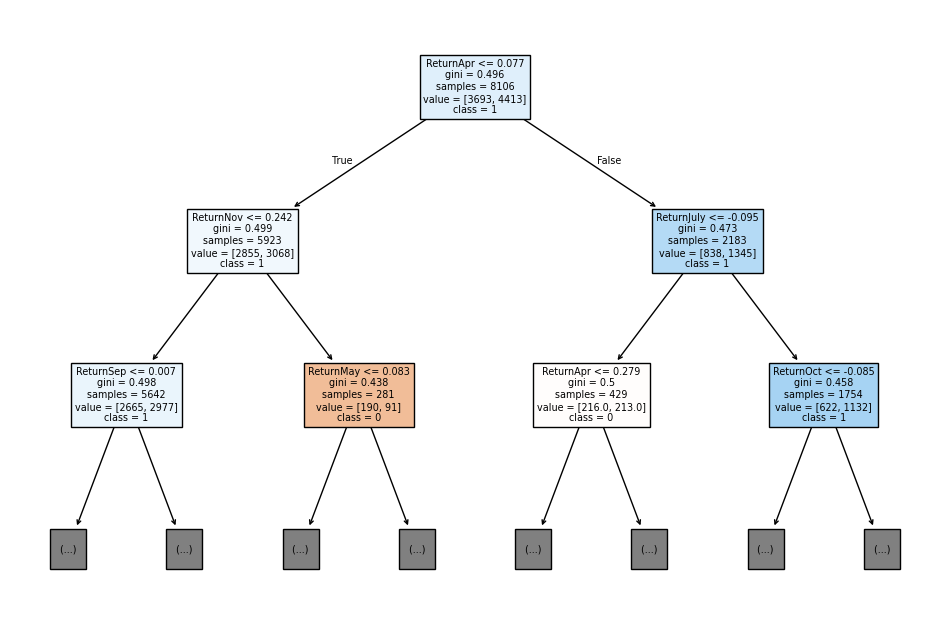

In [ ]:
# Plot Decision Tree
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(cart_model, filled=True, feature_names=X.columns, class_names=["0", "1"], max_depth=2)
plt.show()

## Random Forest Model

Next, we can use the stocksTrain data frame to train a Random Forest model to predict PositiveDec using all the other variables as independent variables. We have set the random seed to 144, and the random forest model parameters to n_estimators=1000, min_samples_leaf=10.

Below, we also compute the AUC on the test set.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=1000, min_samples_leaf=10, random_state=144)
rf_model.fit(X_train, y_train)
rf_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Random Forest AUC
rf_auc = roc_auc_score(y_test, rf_pred_prob)
print("Random Forest AUC:", rf_auc)

Random Forest AUC: 0.6184138501111356


## Boosting Trees

Lastly, we will use a Boosting Tree model to predict PositiveDec using all the other variables as independent variables. We set the random seed to 144, the model parameters to n_estimators = 1000, learning_rate = 0.001, max_depth = 10.

Below, we also compute the AUC on the test set.

In [ ]:
# Gradient Boosting Model
gbm_model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.001,
                                       max_depth=10, random_state=144)
gbm_model.fit(X_train, y_train)
gbm_pred_prob = gbm_model.predict_proba(X_test)[:, 1]

# Gradient Boosting AUC
gbm_auc = roc_auc_score(y_test, gbm_pred_prob)
print("Gradient Boosting AUC:", gbm_auc)

Gradient Boosting AUC: 0.5845817041320195
